In [2]:
import aspinity

In [3]:
from aspinity import (
    Comparator,
    Filter,
    FilterType,
    PeakDetector,
    Network,
    Terminal
)

def test_network(frequency):
    network = Network()
    network.add(
        Terminal(net="in", is_input=True),
        Filter(
            input="in",
            output="henk0",
            characteristic_frequency=frequency,
            filter_type=FilterType.bpf2,
            quality_factor=1.0,
        ),
        Terminal(net="henk0", is_output=True),
        Terminal(net="henk1", is_output=True),
        Terminal(net="henk2", is_output=True),
    )
    return network

def energy_change_detector_network():
    energy_detector = Network()
    energy_detector.add(
        Terminal(net="in", is_input=True, hardware_pin="A0"),
        PeakDetector(input="in", output="energy", atk=20e3, dec=100),
        Filter(
            input="energy",
            output="mean_energy",
            filter_type=FilterType.lpf1,
            characteristic_frequency=20,
        ),
        Comparator(
            positive="energy",
            negative="mean_energy",
            output="detection",
            threshold=0.09,
        ),
        Terminal(net="energy", is_output=True),
        Terminal(net="mean_energy", is_output=True),
        Terminal(net="detection", is_output=True, hardware_pin="D3"),
    )
    return energy_detector

net1 = test_network(1000)
energy_net = energy_change_detector_network()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

sample_rate = 32000
times = np.arange(2 * sample_rate) / sample_rate

thump_times = (0.5, 1.75)
modulation_time = 1.25

def normal(x, mean, variance):
    return np.exp(-((x - mean) ** 2) / variance)

samples = (
    np.random.randn(len(times)) ## white background noise
    * (1 + 0.3 * np.sin(2 * np.pi * 10 * times)) ## continuous modulation
    * (1 + 4 * normal(times, thump_times[0], 1e-5)) ## first fast thump
    * (1 + 4 * normal(times, thump_times[1], 1e-5)) ## second fast thump
    * (1 + 4 * normal(times, modulation_time, 0.02)) ## background rise/fall
) / 50

In [5]:
import wrapper_network

#wav_file = '/home/sbhatna2/Music/rising-chirp.wav'
wav_file = '../test_resources/rising-chirp.wav'

times, samples = wrapper_network.WavFileManager.load_wav(wav_file)
#help(net1)

In [ ]:
import AspinitySimulatorWrapper

AspinitySimulatorWrapper.simulate_network()

In [6]:
# how to know which ones to draw? Ans: look at the output Terminals


#print(help(net1))
print(energy_net.output_terminal_names)
print(energy_net.get_connected_net("henk"))
print(type(net1.connected_terminals(False)))
print(energy_net.connected_terminals(False))

print("----------------------------")
result = aspinity.simulate(energy_net, times, samples)
print(type(result))
print(*result.items(), sep = '\n')
# print(result['filter_out'].shape)

{'energy_out_': True, 'mean_energy_out_': True, 'detection_out_D3': True}
None
<class 'list'>
['energy_out_', 'mean_energy_out_', 'detection_out_D3']
----------------------------
<class 'dict'>
('vdd', array([2.5, 2.5, 2.5, 2.5, 2.5]))
('mean_energy', array([0.        , 0.        , 0.        , ..., 0.12146963, 0.12142929,
       0.12138387]))
('detection', array([0., 0., 0., ..., 0., 0., 0.]))
('in', array([-0.07403564, -0.09246826, -0.0743103 , -0.05447388, -0.03656006]))
('', array([0., 0., 0., ..., 0., 0., 0.]))
('Gnd', array([0., 0., 0., ..., 0., 0., 0.]))
('energy', array([0.        , 0.        , 0.        , ..., 0.11596904, 0.11527829,
       0.11458476]))
('detection_pos_offset', array([0.02801674, 0.02733832, 0.02665602, 0.02596904, 0.02527829]))


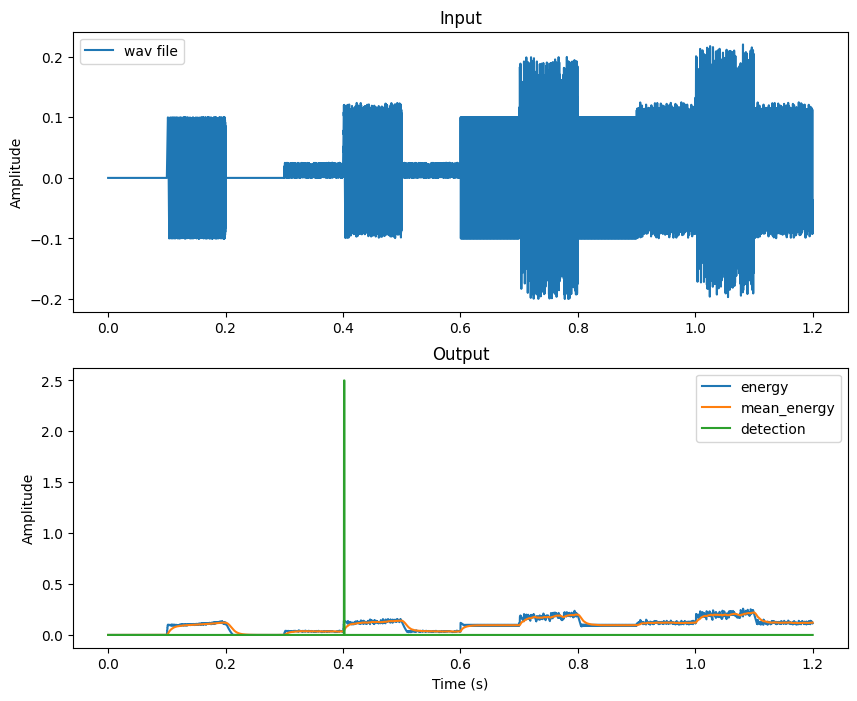

In [34]:
# Assuming you have a figure with two subplots (1 for input, and 1 for output)
fig, (input_subplot, output_subplot) = plt.subplots(2, 1, figsize=(10, 8))

# Plot input in the first subplot
input_subplot.plot(times, samples, label="wav file")
input_subplot.set_ylabel("Amplitude")
input_subplot.legend()
input_subplot.set_title("Input")

# Iterate through output terminals and plot each in the second subplot
for terminal in energy_net.output_terminal_names:
    terminal_name = terminal[:terminal.find("_out_")]
    output_subplot.plot(times, result[terminal_name], label=terminal_name)

output_subplot.set_xlabel("Time (s)")
output_subplot.set_ylabel("Amplitude")
output_subplot.legend()
output_subplot.set_title("Output")

plt.show()

In [12]:
aspinity.FilterType.bpf2.__class__.__module__

'aspinity.native'

In [13]:
aspinity.AcDiff.__module__

'aspinity.native'

In [14]:
type(aspinity.FilterType.bpf2)

aspinity.native.FilterType